In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("ab_test_analysis.tsv", sep='\t', parse_dates=True)
df['conversion_rate'] = df['conversions']/df['visits']
df[:5]

,date,version,location,device,browser,visits,bounce_rate,time_on_page,conversions,conversion_rate
0,2017-10-01,0,Australia,Desktop,Chrome,981,0.39,186,0,0.000000
1,2017-10-01,0,Australia,Desktop,Safari,176,0.51,172,2,0.011364
2,2017-10-01,0,Australia,Desktop,Other,241,0.43,127,1,0.004149
3,2017-10-01,0,Australia,Tablet,Chrome,220,0.47,159,2,0.009091
4,2017-10-01,0,Australia,Tablet,Safari,93,0.34,135,1,0.010753


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 10 columns):
date               2430 non-null object
version            2430 non-null int64
location           2430 non-null object
device             2430 non-null object
browser            2430 non-null object
visits             2430 non-null int64
bounce_rate        2430 non-null float64
time_on_page       2430 non-null int64
conversions        2430 non-null int64
conversion_rate    2430 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 189.9+ KB


date


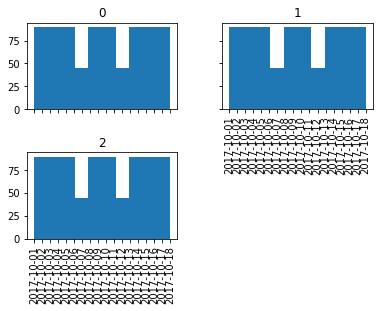

version


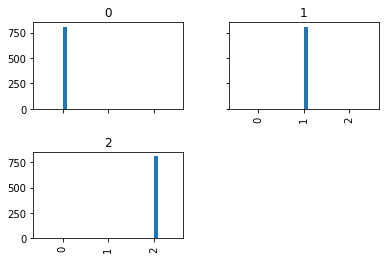

location


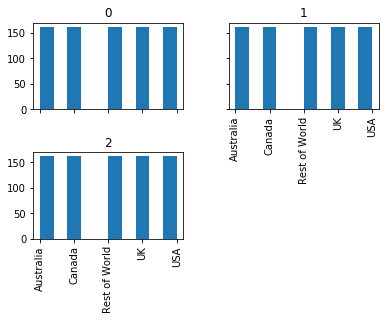

device


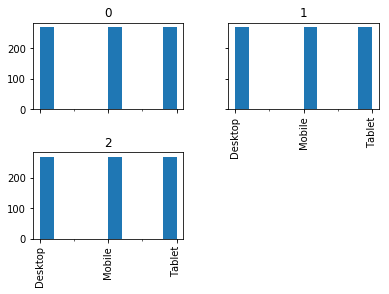

browser


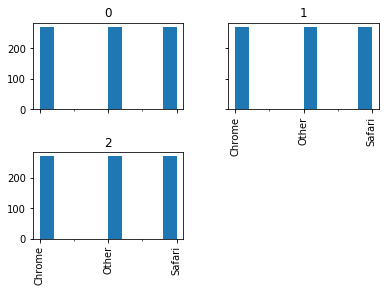

visits


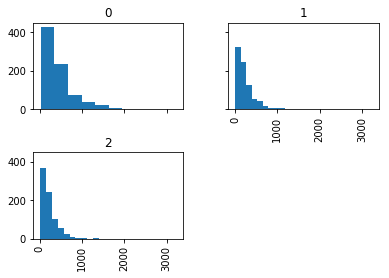

bounce_rate


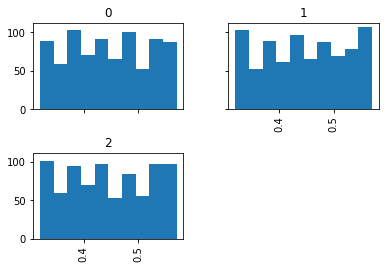

time_on_page


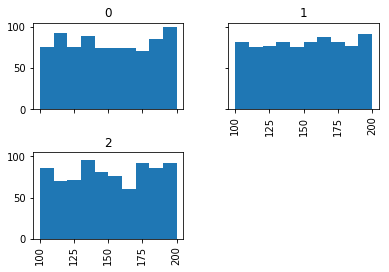

conversions


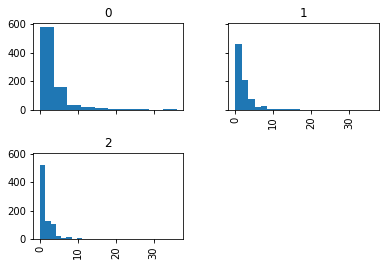

conversion_rate


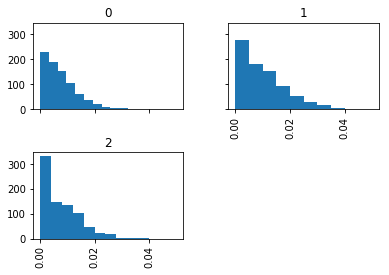

In [76]:
def histPlots(DataFrame):
    for i in DataFrame.columns:
        plt.figure()
        df.hist(column=i, by='version', sharex=True, sharey=True, bins=10)
        print(i)
        plt.show()
    
histPlots(df) 

In [77]:
df_version0 = df[df['version'] == 0]
df_version0.describe()

,version,visits,bounce_rate,time_on_page,conversions,conversion_rate
count,810.0,810.000000,810.000000,810.000000,810.000000,810.000000
mean,0.0,445.016049,0.443605,150.135802,3.009877,0.007280
std,0.0,386.678881,0.073650,29.773041,3.744946,0.006200
min,0.0,29.000000,0.320000,100.000000,0.000000,0.000000
25%,0.0,191.000000,0.380000,124.000000,1.000000,0.002581
50%,0.0,327.500000,0.440000,149.000000,2.000000,0.006173
75%,0.0,575.000000,0.507500,177.000000,4.000000,0.010479
max,0.0,3235.000000,0.570000,200.000000,36.000000,0.032258


In [78]:
df_version1 = df[df['version'] == 1]
df_version1.describe()

,version,visits,bounce_rate,time_on_page,conversions,conversion_rate
count,810.0,810.000000,810.000000,810.000000,810.000000,810.000000
mean,1.0,225.151852,0.446420,150.272840,1.976543,0.009725
std,0.0,185.328734,0.075619,29.030028,2.249723,0.008751
min,1.0,7.000000,0.320000,100.000000,0.000000,0.000000
25%,1.0,95.000000,0.380000,125.000000,1.000000,0.002232
50%,1.0,166.000000,0.450000,151.000000,1.000000,0.008258
75%,1.0,298.750000,0.510000,175.000000,3.000000,0.014706
max,1.0,1307.000000,0.570000,200.000000,17.000000,0.050000


In [79]:
df_version2 = df[df['version'] == 2]
df_version2.describe()

,version,visits,bounce_rate,time_on_page,conversions,conversion_rate
count,810.0,810.000000,810.000000,810.000000,810.000000,810.000000
mean,2.0,222.859259,0.443111,150.616049,1.517284,0.007115
std,0.0,184.568732,0.076118,29.490850,1.859814,0.007065
min,2.0,15.000000,0.320000,100.000000,0.000000,0.000000
25%,2.0,97.000000,0.380000,126.000000,0.000000,0.000000
50%,2.0,170.500000,0.440000,150.000000,1.000000,0.006039
75%,2.0,290.250000,0.510000,176.000000,2.000000,0.011761
max,2.0,1399.000000,0.570000,200.000000,14.000000,0.040000


In [80]:
print(df_version0.conversion_rate.mean())
print(df_version1.conversion_rate.mean())
print(df_version2.conversion_rate.mean())

0.007280442676450924
0.00972459915365043
0.0071150692923082825


In [128]:
print((df_version1.conversion_rate.mean()-df_version0.conversion_rate.mean())/df_version0.conversion_rate.mean())
print((df_version2.conversion_rate.mean()-df_version0.conversion_rate.mean())/df_version0.conversion_rate.mean())



0.3357153659220878
0.006345318935766706
0.000912753885371238


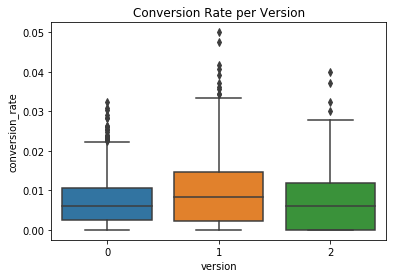

In [81]:
fig = plt.figure()
sns.boxplot(x="version", y="conversion_rate", data=df)
plt.title("Conversion Rate per Version") 
plt.show()
fig.savefig('conv_rate_byversion.png', dpi=fig.dpi)

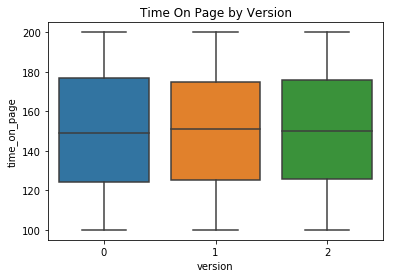

In [144]:
fig = plt.figure()
sns.boxplot(x="version", y="time_on_page", data=df)
plt.title("Time On Page by Version")
plt.show()
fig.savefig('time_on_page_byversion.png', dpi=fig.dpi)

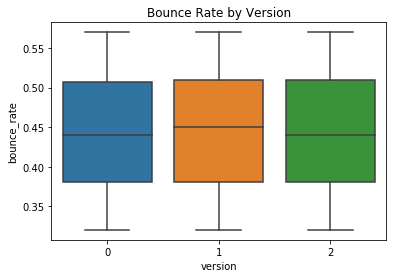

In [145]:
fig = plt.figure()
sns.boxplot(x="version", y="bounce_rate", data=df)
plt.title("Bounce Rate by Version")
plt.show()
fig.savefig('bounce_rate_byversion.png', dpi=fig.dpi)

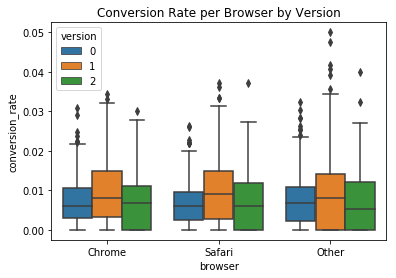

In [82]:
fig = plt.figure()
sns.boxplot(x="browser", y="conversion_rate", hue="version", data=df)
plt.title("Conversion Rate per Browser by Version") 
plt.show()
fig.savefig('conv_rate_bybrowser_byversion.png', dpi=fig.dpi)

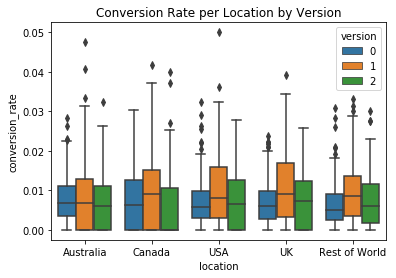

In [83]:
fig = plt.figure()
sns.boxplot(x="location", y="conversion_rate", hue="version", data=df)
plt.title("Conversion Rate per Location by Version") 
plt.show()
fig.savefig('conv_rate_bylocation_byversion.png', dpi=fig.dpi)

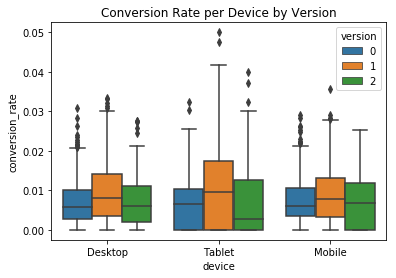

In [84]:
fig = plt.figure()
sns.boxplot(x="device", y="conversion_rate", hue="version", data=df)
plt.title("Conversion Rate per Device by Version")
plt.show()
fig.savefig('conv_rate_bydevice_byversion.png', dpi=fig.dpi)

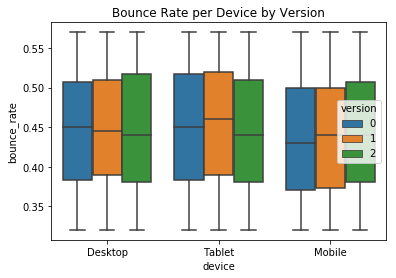

In [129]:
fig = plt.figure()
sns.boxplot(x="device", y="bounce_rate", hue="version", data=df)
plt.title("Bounce Rate per Device by Version")
plt.show()
fig.savefig('bounce_rate_bydevice_byversion.png', dpi=fig.dpi)

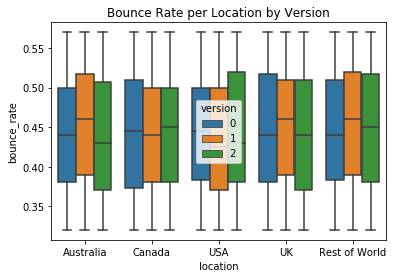

In [130]:
fig = plt.figure()
sns.boxplot(x="location", y="bounce_rate", hue="version", data=df)
plt.title("Bounce Rate per Location by Version")
plt.show()
fig.savefig('bounce_rate_bylocation_byversion.png', dpi=fig.dpi)

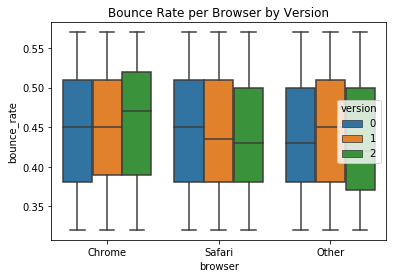

In [131]:
fig = plt.figure()
sns.boxplot(x="browser", y="bounce_rate", hue="version", data=df)
plt.title("Bounce Rate per Browser by Version")
plt.show()
fig.savefig('bounce_rate_bybrowser_byversion.png', dpi=fig.dpi)

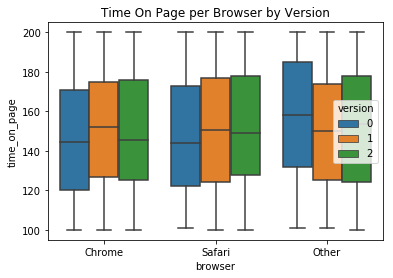

In [132]:
fig = plt.figure()
sns.boxplot(x="browser", y="time_on_page", hue="version", data=df)
plt.title("Time On Page per Browser by Version")
plt.show()
fig.savefig('time_on_page_bybrowser_byversion.png', dpi=fig.dpi)

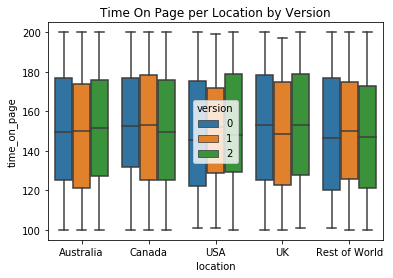

In [133]:
fig = plt.figure()
sns.boxplot(x="location", y="time_on_page", hue="version", data=df)
plt.title("Time On Page per Location by Version")
plt.show()
fig.savefig('time_on_page_bylocation_byversion.png', dpi=fig.dpi)

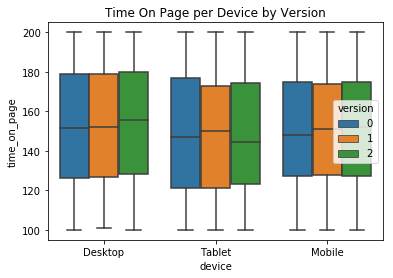

In [134]:
fig = plt.figure()
sns.boxplot(x="device", y="time_on_page", hue="version", data=df)
plt.title("Time On Page per Device by Version")
plt.show()
fig.savefig('time_on_page_bydevice_byversion.png', dpi=fig.dpi)

In [151]:
from sklearn.cluster import MiniBatchKMeans
import time
start_time = time.time()

k = 2

from sklearn.preprocessing import StandardScaler

df2 = df[df["version"] == 0]   #isolate version (IN LIEU OF THE DE-DIMENSIONALIZED COLUMNS)
df2 = df2[["visits", "bounce_rate", "time_on_page", "conversions", "conversion_rate"]]


std_scaler = StandardScaler()
np_norm_data = std_scaler.fit_transform(df2) 
np_norm_data.shape

kmeans = MiniBatchKMeans(n_clusters=k, max_iter=500, 
                        batch_size=1024*8, 
                        max_no_improvement=None, 
                        init_size=3*1024*8, n_init=100, reassignment_ratio=0.05)
kmeans.fit(np_norm_data)

print("Elapsed time was {} seconds".format(time.time() - start_time))
print("version0")

cluster_metrics = std_scaler.inverse_transform(kmeans.cluster_centers_)
cluster_metrics_pd = pd.DataFrame(cluster_metrics, columns=df2.columns)
cluster_metrics_pd['total_rows'] = pd.Series(np.bincount(kmeans.labels_))
cluster_metrics_pd['percent_total_rows'] = pd.Series(np.bincount(kmeans.labels_)) / np_norm_data.shape[0]
cluster_metrics_pd

Elapsed time was 1.5093750953674316 seconds
version0


,visits,bounce_rate,time_on_page,conversions,conversion_rate,total_rows,percent_total_rows
0,341.319782,0.440474,151.379211,1.980329,0.006813,705,0.87037
1,1133.086461,0.464568,141.980357,9.854410,0.010404,105,0.12963


In [152]:
from sklearn.cluster import MiniBatchKMeans
import time
start_time = time.time()

k = 2

from sklearn.preprocessing import StandardScaler

df2 = df[df["version"] == 1]   #isolate version (IN LIEU OF THE DE-DIMENSIONALIZED COLUMNS)
df2 = df2[["visits", "bounce_rate", "time_on_page", "conversions", "conversion_rate"]]


std_scaler = StandardScaler()
np_norm_data = std_scaler.fit_transform(df2)
np_norm_data.shape

kmeans = MiniBatchKMeans(n_clusters=k, max_iter=500, 
                        batch_size=1024*8, 
                        max_no_improvement=None, 
                        init_size=3*1024*8, n_init=100, reassignment_ratio=0.05)
kmeans.fit(np_norm_data)

print("Elapsed time was {} seconds".format(time.time() - start_time))
print("version1")

cluster_metrics = std_scaler.inverse_transform(kmeans.cluster_centers_)
cluster_metrics_pd = pd.DataFrame(cluster_metrics, columns=df2.columns)
cluster_metrics_pd['total_rows'] = pd.Series(np.bincount(kmeans.labels_))
cluster_metrics_pd['percent_total_rows'] = pd.Series(np.bincount(kmeans.labels_)) / np_norm_data.shape[0]
cluster_metrics_pd

Elapsed time was 1.8584020137786865 seconds
version1


,visits,bounce_rate,time_on_page,conversions,conversion_rate,total_rows,percent_total_rows
0,174.324739,0.443109,151.176459,0.868837,0.006331,558,0.688889
1,338.389377,0.453763,148.319320,4.443942,0.017274,252,0.311111


In [153]:
from sklearn.cluster import MiniBatchKMeans
import time
start_time = time.time()

k = 2

from sklearn.preprocessing import StandardScaler

df2 = df[df["version"] == 2]   #isolate version (IN LIEU OF THE DE-DIMENSIONALIZED COLUMNS)
df2 = df2[["visits", "bounce_rate", "time_on_page", "conversions", "conversion_rate"]]


std_scaler = StandardScaler()
np_norm_data = std_scaler.fit_transform(df2)  
np_norm_data.shape

kmeans = MiniBatchKMeans(n_clusters=k, max_iter=500, 
                        batch_size=1024*8, 
                        max_no_improvement=None, 
                        init_size=3*1024*8, n_init=100, reassignment_ratio=0.05)
kmeans.fit(np_norm_data)

print("Elapsed time was {} seconds".format(time.time() - start_time))
print("version 2")

cluster_metrics = std_scaler.inverse_transform(kmeans.cluster_centers_)
cluster_metrics_pd = pd.DataFrame(cluster_metrics, columns=df2.columns)
cluster_metrics_pd['total_rows'] = pd.Series(np.bincount(kmeans.labels_))
cluster_metrics_pd['percent_total_rows'] = pd.Series(np.bincount(kmeans.labels_)) / np_norm_data.shape[0]
cluster_metrics_pd

Elapsed time was 1.460068702697754 seconds
version 2


,visits,bounce_rate,time_on_page,conversions,conversion_rate,total_rows,percent_total_rows
0,300.317885,0.453480,152.438242,3.239346,0.013707,289,0.35679
1,179.347336,0.437319,149.590986,0.547811,0.003398,521,0.64321
